In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

np.random.seed(1)

In [2]:
def diffuse(data, sigma):
    return data + sigma * np.random.normal(size=data.shape)


def reflect_value(data, abs_limit=10):
    while not np.all((data_abs := np.abs(data)) < abs_limit):
        data_sign = np.sign(data)
        data = np.where(data_abs > abs_limit, 2*abs_limit-data_abs, data_abs) * data_sign
    return data
    

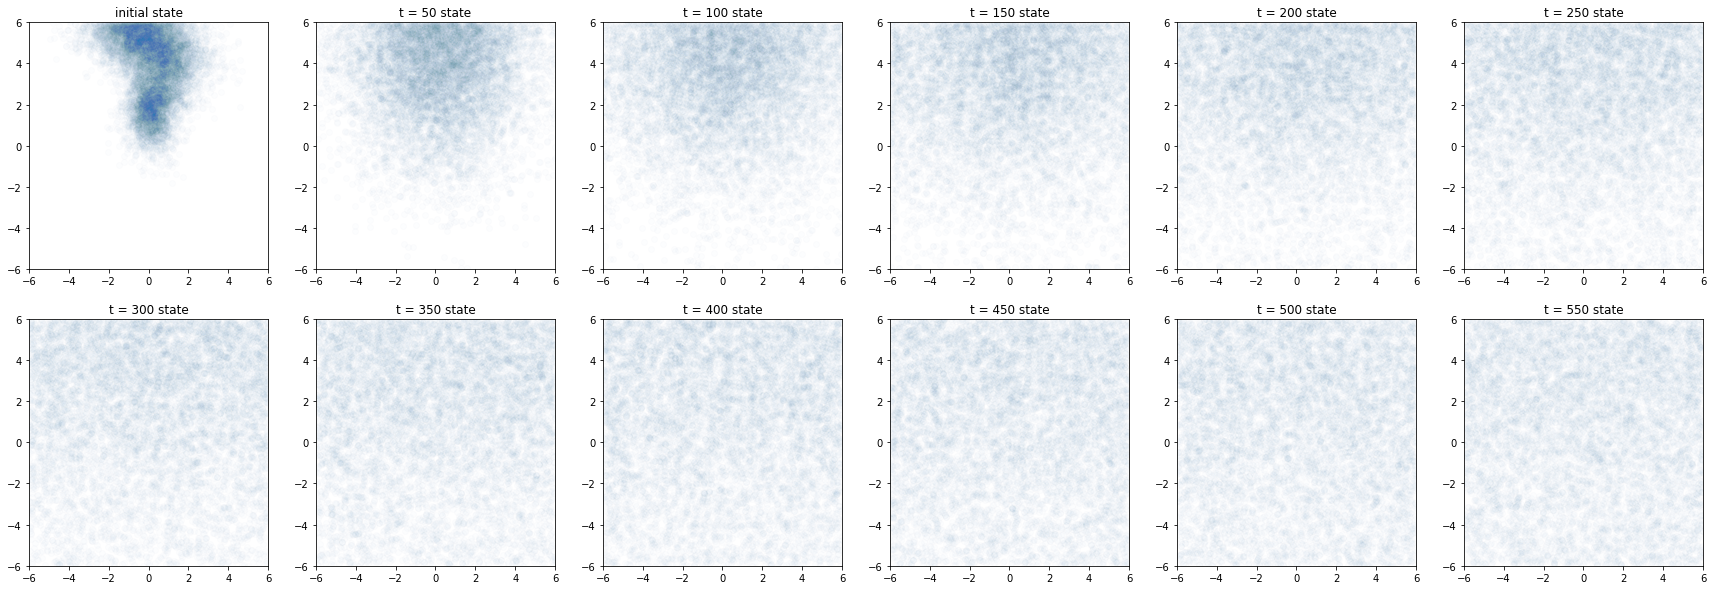

In [3]:
n_data = 5000
abs_limit = 6
sigma = 0.3
t_step = 50

alpha = 0.01
axis_xmin = -6
axis_xmax = 6
axis_ymin = -6
axis_ymax = 6

nrows = 2
ncols = 6
_h = _w = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*_w, nrows*_h))
axes = axes.reshape(-1)

mean = [0, 3]
cov = [[1, 0], [0, 1]]
data = np.concatenate([
    np.random.multivariate_normal([0., 5.], [[2., -0.5], [-0.5, 1.]] , n_data).T,
    np.random.multivariate_normal([0.5, 2.5], [[0.7, 0.3], [0.3, 1.3]] , n_data//2).T,
    np.random.multivariate_normal([0., 1.5], [[0.3, -0.2], [-0.2, 1.]] , n_data//4).T,
], axis=1)

data = reflect_value(data, abs_limit)
axes[0].scatter(data[0], data[1], alpha=alpha)
axes[0].set_xlim([axis_xmin, axis_xmax])
axes[0].set_ylim([axis_ymin, axis_ymax])
axes[0].set_title("initial state")

t = 0
for i in range(1, nrows * ncols):
    for _ in range(t_step):
        data = diffuse(data, sigma=sigma)
        data = reflect_value(data, abs_limit=abs_limit)
        t += 1
    axes[i].scatter(data[0], data[1], alpha=alpha)
    axes[i].set_xlim([axis_xmin, axis_xmax])
    axes[i].set_ylim([axis_ymin, axis_ymax])
    axes[i].set_title(f"t = {t} state")

plt.show()


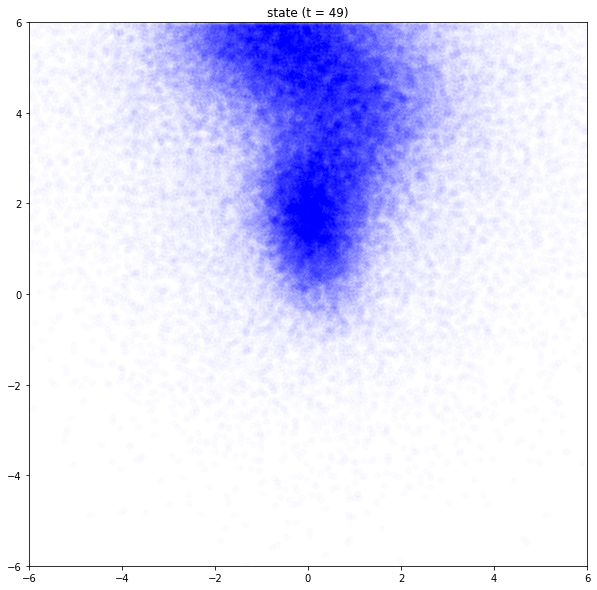

In [11]:

%matplotlib inline

class UpdateFrames:
    def __init__(self, ax, n_data=10000, sigma=0.3, alpha=0.01, abs_limit=6, ax_lims=[-6, 6, -6, 6]):
        self.title = ax.set_title("")
        self.scatter = ax.scatter([], [], alpha=alpha, color="b")
        self.ax = ax
        self.ax.set_xlim((ax_lims[0], ax_lims[1]))
        self.ax.set_ylim((ax_lims[2], ax_lims[3]))

        self.n_data = n_data
        self.sigma = sigma
        self.alpha = alpha
        self.abs_limit = abs_limit
    
    def __call__(self, i):
        if i == 0:
            self.t = 0
            self.data =  np.concatenate([
                np.random.multivariate_normal([0., 5.], [[2., -0.5], [-0.5, 1.]] , self.n_data//10*5).T,
                np.random.multivariate_normal([0.5, 2.5], [[0.7, 0.3], [0.3, 1.3]] , self.n_data//10*3).T,
                np.random.multivariate_normal([0., 1.5], [[0.3, -0.2], [-0.2, 1.]] , self.n_data//10*2).T,
            ], axis=1)
            self.data = reflect_value(self.data, self.abs_limit)

            self.scatter.set_offsets(self.data.T)

            self.title.set_text(f"state (t = {self.t})")
            return self.scatter, self.title

        self.data = reflect_value(diffuse(self.data, self.sigma), self.abs_limit)
        self.scatter.set_offsets(self.data.T)
        self.t += 1
        self.title.set_text(f"state (t = {self.t})")
        return self.scatter, self.title

fig, ax = plt.subplots(figsize=(10, 10))
uf = UpdateFrames(ax, n_data=30000, sigma=0.3, alpha=0.01, abs_limit=6, ax_lims=[-6, 6, -6, 6])
anim = FuncAnimation(fig, uf, frames=50, interval=100, blit=True)
HTML(anim.to_html5_video())

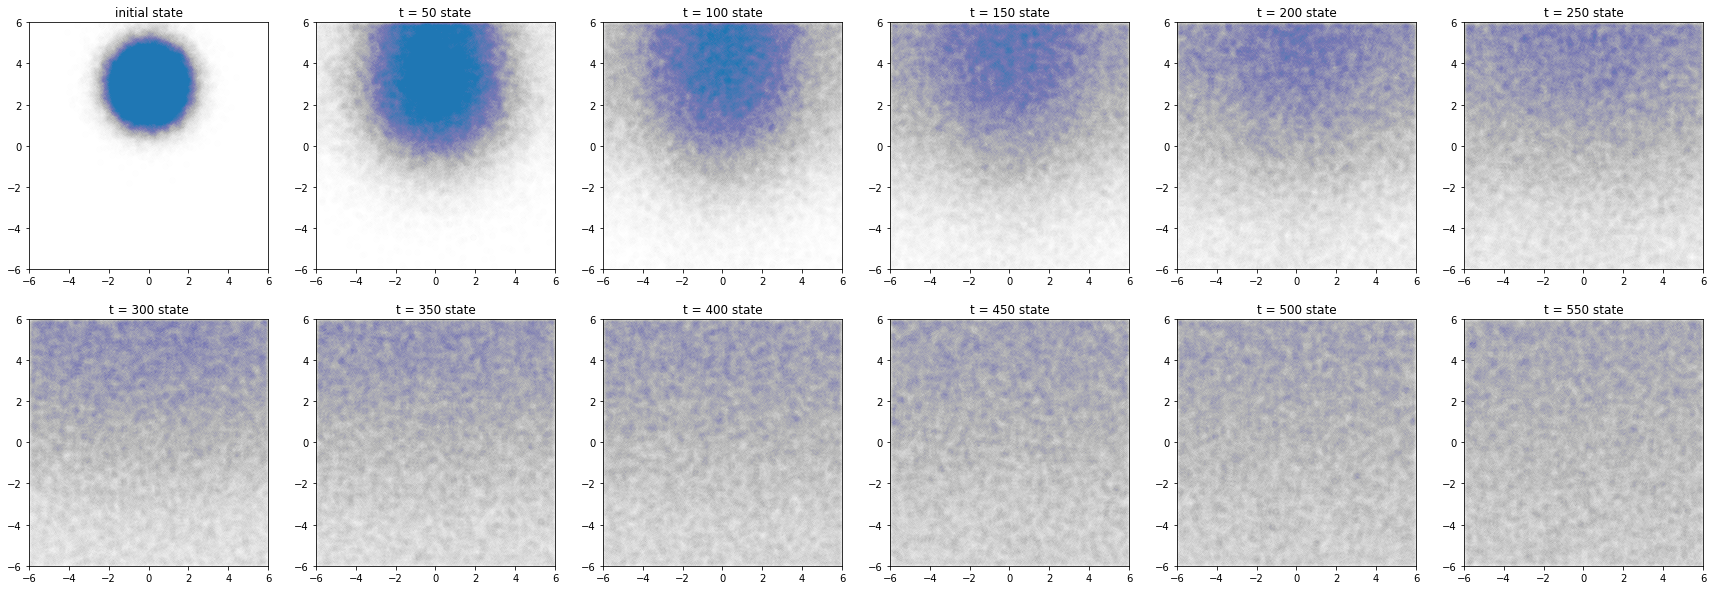

In [61]:
n_data = 100000
abs_limit = 6
sigma = 0.3
t_step = 50

alpha = 0.003
axis_xmin = -6
axis_xmax = 6
axis_ymin = -6
axis_ymax = 6

nrows = 2
ncols = 6
_h = _w = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*_w, nrows*_h))
axes = axes.reshape(-1)

mean = [0, 3]
cov = [[1, 0], [0, 1]]
data = np.random.multivariate_normal(mean, cov, n_data).T

data = reflect_value(data, abs_limit)
axes[0].scatter(data[0], data[1], alpha=alpha)
axes[0].set_xlim([axis_xmin, axis_xmax])
axes[0].set_ylim([axis_ymin, axis_ymax])
axes[0].set_title("initial state")

t = 0
for i in range(1, nrows * ncols):
    for _ in range(t_step):
        data = diffuse(data, sigma=sigma)
        data = reflect_value(data, abs_limit=abs_limit)
        t += 1
    axes[i].scatter(data[0], data[1], alpha=alpha)
    axes[i].set_xlim([axis_xmin, axis_xmax])
    axes[i].set_ylim([axis_ymin, axis_ymax])
    axes[i].set_title(f"t = {t} state")

plt.show()

